Import handwritten digit data from yann.lecun.com/exdb/mnist (four files). You only need the training data for this assignment. Refer to the Python code suggested in Read_MNIST.html
View in a new window to read and parse the data.

In [4]:
import os, struct
import matplotlib as plt
from array import array as pyarray
from numpy import append, array, int8, uint8, zeros as np

def load_mnist(dataset="training", digits=range(10), path='.\\'):
    
    """
    Adapted from: http://cvxopt.org/applications/svm/index.html?highlight=mnist
    """

    if dataset == "training":
        fname_img = os.path.join(path, 'train-images.idx3-ubyte')
        fname_lbl = os.path.join(path, 'train-labels.idx1-ubyte')
    elif dataset == "testing":
        fname_img = os.path.join(path, 't10k-images.idx')
        fname_lbl = os.path.join(path, 't10k-labels.idx')
    else:
        raise ValueError("dataset must be 'testing' or 'training'")

    flbl = open(fname_lbl, 'rb')
    magic_nr, size = struct.unpack(">II", flbl.read(8))
    lbl = pyarray("b", flbl.read())
    flbl.close()

    fimg = open(fname_img, 'rb')
    magic_nr, size, rows, cols = struct.unpack(">IIII", fimg.read(16))
    img = pyarray("B", fimg.read())
    fimg.close()

    ind = [ k for k in range(size) if lbl[k] in digits ]
    N = len(ind)

    images = zeros((N, rows, cols), dtype=uint8)
    labels = zeros((N, 1), dtype=int8)
    for i in range(len(ind)):
        images[i] = array(img[ ind[i]*rows*cols : (ind[i]+1)*rows*cols ]).reshape((rows, cols))
        labels[i] = lbl[ind[i]]

    return images, labels

Prepare the data you will use for this assignment by limiting the imported data to two specific digits. The exact two digits that you will use for the rest of the assignment is given in a table following these instructions. The positive and negative class labels have also been identified for you.

In [5]:
from pylab import *
from numpy import *
import scipy.sparse as sparse
import scipy.linalg as linalg

images, labels = load_mnist('training', digits=[1,9])

# converting from NX28X28 array into NX784 array
flatimages = list()
for i in images:
    flatimages.append(i.ravel())
X = np.asarray(flatimages)

Check shape of matrix (12691, 784)
Check Mins and Max Values 0 255

Check training vector by plotting image 



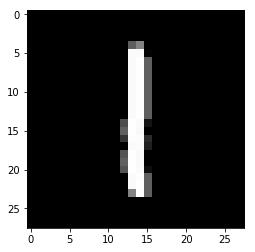

In [6]:
print("Check shape of matrix", X.shape)
print("Check Mins and Max Values",np.amin(X),np.amax(X))
print("\nCheck training vector by plotting image \n")
plt.imshow(X[25].reshape(28, 28),interpolation='None', cmap=cm.gray)
show()

Prepare your X matrix and target vector T

Go through the XZCVP procedure to produce P which is the 2D approximation to X. The mean vector (mu) and two eigenvectors (v1, v2) calculated in completing this step must also be entered into the Excel template attached. You will also need to paste a picture of the 2D scatterplot showing the two classes.s

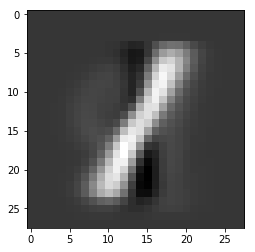

In [72]:
X_miu = X.mean(axis=0)

Z = X - X_miu
 
C=np.cov(Z,rowvar=False)
#C = np.cov(Z.T)
#verified that C=C.T

[λ,V]=np.linalg.eigh(C)
V=np.flipud(V.T)
V_new=np.ndarray((2, 784))
V_new[0] = V[0, :]
V_new[1] = V[1, :]

V_new = np.real(V_new)

P=np.dot(Z,V_new.T)

R=np.dot(P,V_new)

Xrec=R+X_miu

showimage(Xrec[50])

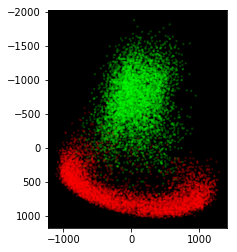

In [102]:
#Plot 2D point-clouds of the first two principal components of 𝑃 and verify that they form two (mostly) separable clusters.

Xrec2=(np.dot(P[:,0:2],V_new[0:2,:]))+X_miu

#showimage(Xrec2[50])

#Note that T contains class labels labeln and labelp (e.g. 5 & 6)
import pandas as pd

T=labels

cols=zeros((12691,4))
#cols[T==9]=[0,1,0,0.25]
#cols[T==1]=[1,0,0,0.25]

for i in range(len(cols)):
    if T[i]==9:
        cols[i] = [0,1,0,0.25]
    else:
        cols[i] = [1,0,0,0.25]

randomorder=permutation(arange(alen(T))); #Don't worry about this stuff. Just makes a pretty picture
 
fig = figure()
ax = fig.add_subplot(111, facecolor='black')
ax.scatter(P[randomorder,1],P[randomorder,0],s=5,linewidths=0,facecolors=cols[randomorder,:],marker="o");
ax.set_aspect('equal');
gca().invert_yaxis();
show()

Optional: Write a program, call a builtin function or use the “manual” procedure explained in class to convert any given 784 element feature vector in X to an image. No submission is required.

In [10]:
import pylab
def showimage(arr):
    pylab.imshow(arr.reshape(28,28),interpolation='None', cmap=cm.gray)
    show()

Optional: Visually verify that the corresponding element of P, when projected back to 784 dimensions and visualized as an image still looks like the original image. That is, visually verify that reduction in dimension does not significantly compromise the identity of the samples. No submission is required.

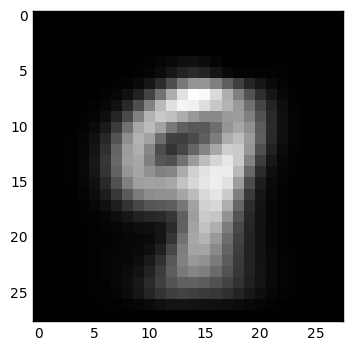

In [103]:
showimage(Xrec[100])

In [45]:
# inputting data into Excel
import ReadWriteExcel as rw

# writeExcelData(x,excelfile,sheetname,startrow,startcol)
rw.writeExcelData(pd.DataFrame(X_miu).T, "Assignment_3_ Submission_Template.xlsx", "Results", 2, 2)
rw.writeExcelData(pd.DataFrame(V_new[0]).T, "Assignment_3_ Submission_Template.xlsx", "Results", 3, 2)
rw.writeExcelData(pd.DataFrame(V_new[1]).T, "Assignment_3_ Submission_Template.xlsx", "Results", 4, 2)

Build a histogram classifier and a Bayesian classifier (both 2D) assuming that the feature vectors are distributed normally in the reduced dimensional space. Note: All the specifications needed to apply the classifiers must be entered into the Excel template attached. For the histogram classifier, the specifications include the ranges (min, max) covered by the two features, number of bins (fixed for you at 25x25), and the histogram counts. For the Bayesian classifier, the specifications include the number of samples in the two classes, the mean vectors and covariance matrices. In order to use either classifier on a 784D query, the mean vectors and eigenvectors (Step 4 above) are needed.

In [ ]:
df=pd.DataFrame(labels)
one = df.loc[df[0] == 1]
nine = df.loc[df[0] == 9]

n_p = len(df.loc[df[0]== 9])
n_n = len(df.loc[df[0]== 1])





In [ ]:
#write results to Excel file

rw.writeExcelData([n_p, n_n], "Assignment_3_ Submission_Template.xlsx", "Results", 6, 2)

Exhibit any one representative positive feature vector xp and the corresponding mean-subtracted vector (zp), 2D representation (pp), reconstructed mean-subtracted vector (rp), and reconstructed mean-adjusted vector (xrecp). Do the same for any one representative negative feature vector xn.

Run xp and xn through both the classifiers and record the results (e.g. what is xp recognized as? With what probability? See the Excel sheet to understand how to report the results.)

Evaluate the training accuracy of your two classifiers (2D histogram and Bayesian) and record the results.

Note: The helpful document PCA_Simple_Example.html has been provided for guidance in implementing the XZCVPR process. Also see the slide titled "How do I ace Assignment 3?"

Digits: 1 (negative), 9 (positive)